In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install openpyxl  # For reading .xlsx files
!pip install pyxlsb

In [2]:
import pandas as pd

# Load my file
file_path = '/kaggle/input/fundingdf/DistrictCostDatabase_2024 (1).xlsb'  
df = pd.read_excel(file_path, engine='pyxlsb')

print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -3949   -0.373566    3849  0.302567  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  0.334258  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  0.339477  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  0.444417  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  0.389776  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  
0  0.004427  0.022917  0.317

In [3]:
print(df.dtypes)

year            int64
leaid           int64
district       object
state_name     object
stabbr         object
ppcstot         int64
predcost        int64
fundinggap      int64
outcomegap    float64
enroll          int64
pov           float64
iep           float64
ell           float64
amind         float64
asian         float64
black         float64
hisp          float64
multi         float64
pac           float64
white         float64
dtype: object


In [4]:
print(df.describe())

                year         leaid        ppcstot       predcost  \
count  159034.000000  1.590340e+05  159034.000000  159034.000000   
mean     2014.946370  3.012129e+06   12254.636625   11703.865570   
std         3.738836  1.470075e+06    4572.360238    6247.861275   
min      2009.000000  1.000050e+05     251.000000    3282.000000   
25%      2012.000000  1.808010e+06    9216.000000    7991.000000   
50%      2015.000000  3.028911e+06   10931.000000   10098.000000   
75%      2018.000000  4.104590e+06   13981.000000   13305.750000   
max      2021.000000  5.606240e+06  130849.000000   94853.000000   

          fundinggap     outcomegap        enroll            pov  \
count  159034.000000  113880.000000  1.590340e+05  159034.000000   
mean      550.772099       0.024527  3.861922e+03       0.172366   
std      7433.439068       0.353197  1.518221e+04       0.095372   
min    -85859.000000      -3.797798  1.000000e+02       0.000000   
25%     -2412.000000      -0.194640  5.120000e+

In [5]:
print(df.isnull().sum())

year              0
leaid             0
district          0
state_name        0
stabbr            0
ppcstot           0
predcost          0
fundinggap        0
outcomegap    45154
enroll            0
pov               0
iep            4011
ell            1286
amind             0
asian             0
black             0
hisp              0
multi         19668
pac           22171
white             0
dtype: int64


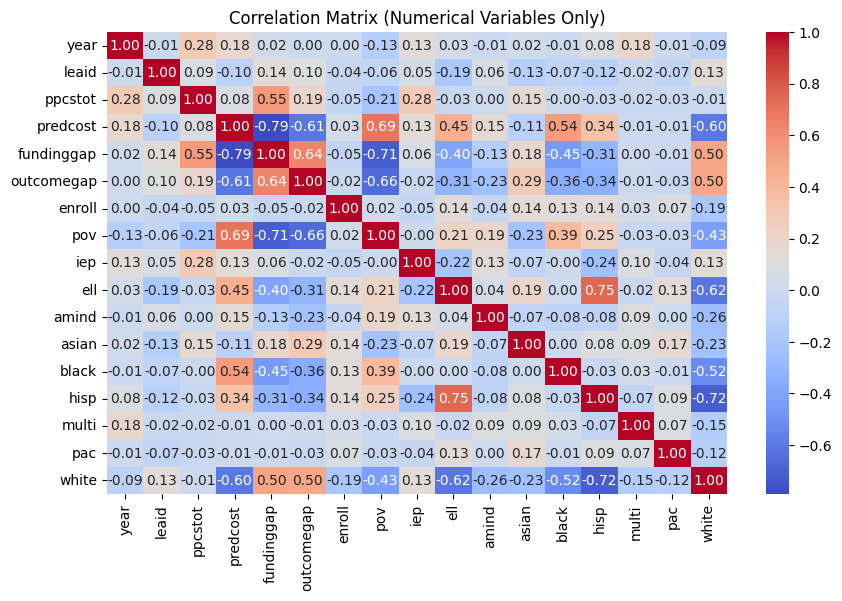

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['float64', 'int64'])
variables_to_remove = ['leaid', 'year'] 

correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

In [7]:
state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Create a new column for regions
df['Region'] = df['state_name'].map(state_to_region)

# Display the updated DataFrame
print(df)

        year    leaid                          district state_name stabbr  \
0       2009   100005                  ALBERTVILLE CITY    Alabama     AL   
1       2010   100005                  ALBERTVILLE CITY    Alabama     AL   
2       2011   100005                  ALBERTVILLE CITY    Alabama     AL   
3       2012   100005                  ALBERTVILLE CITY    Alabama     AL   
4       2013   100005                  ALBERTVILLE CITY    Alabama     AL   
...      ...      ...                               ...        ...    ...   
159029  2017  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ...       iep  \

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# Select relevant features 
features = df[['year', 'ppcstot', 'predcost', 'fundinggap', 'enroll', 'pov', 'asian', 'white' ]]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

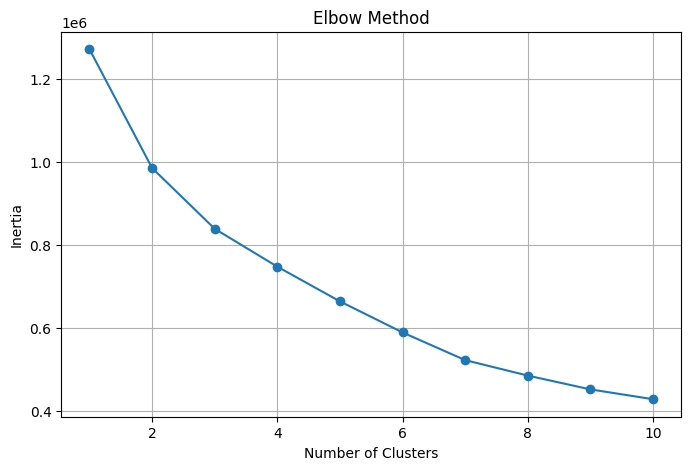

In [12]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [14]:
# Fit the K-Means model
optimal_clusters = 3  # Update based on your elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


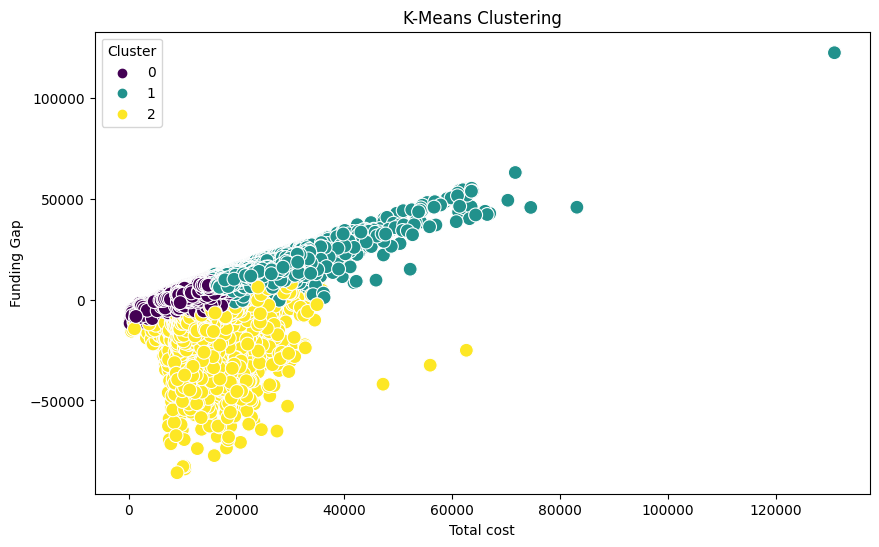

In [16]:
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ppcstot'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Total cost')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

In [17]:
# View all data points in cluster 0
cluster_0 = df[df['cluster'] == 0]
print(cluster_0)

        year    leaid                          district state_name stabbr  \
0       2009   100005                  ALBERTVILLE CITY    Alabama     AL   
1       2010   100005                  ALBERTVILLE CITY    Alabama     AL   
2       2011   100005                  ALBERTVILLE CITY    Alabama     AL   
13      2009   100030                    ALEXANDER CITY    Alabama     AL   
14      2010   100030                    ALEXANDER CITY    Alabama     AL   
...      ...      ...                               ...        ...    ...   
159009  2010  5604830  WESTON COUNTY SCHOOL DISTRICT #1    Wyoming     WY   
159010  2011  5604830  WESTON COUNTY SCHOOL DISTRICT #1    Wyoming     WY   
159011  2012  5604830  WESTON COUNTY SCHOOL DISTRICT #1    Wyoming     WY   
159012  2013  5604830  WESTON COUNTY SCHOOL DISTRICT #1    Wyoming     WY   
159013  2014  5604830  WESTON COUNTY SCHOOL DISTRICT #1    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ...       ell  \

In [19]:
# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Summary of states in each cluster
cluster_summary = df.groupby('cluster')['state'].apply(list).reset_index()

# Display the summary
print(cluster_summary)

NameError: name 'clusters' is not defined